
<h2 align="center">Experiments (Sander's paper, fig.2)</h2> 

In this experiment we reproduce the experiment from fig.2 in the Elastica paper. We analyze the response of single orientaiton selective neuron (with prefered orientation 1 radian, or around 60 degrees). Its response is modulated by 32 neurons with varying orientation from 0 to pi.

In [99]:
# Imports
import math as m
import numpy as np
import matplotlib.pyplot as plt
import holoviews as hv
import pylab as pl
from pylab import exp,cos,sin,pi,tan, pi
import pandas as pd
import seaborn as sb
import holoviews as hv
from IPython.display import SVG
import io
from PIL import Image
from random import random
import elastica as el
import elastica_neurons as en
from dynamics import *
%matplotlib inline
hv.notebook_extension()

In [100]:
# Define some variables
# number of neurons
nn = 100
# flanker orientation
center = pl.pi/2
flanker = pl.pi/2 + pl.pi/10
# constants for von mises function
A = 3
k = 0.25
# offset energy
E0 = 4
# strength of the modulation
a = 0.1/110
# different flanker orientations
theta = pl.linspace(0,pl.pi,nn)
# elastica energies for different flanker orientations (calculated below)
energies = np.zeros(nn)




/afs/inf.ed.ac.uk/user/s12/s1247380/Documents/HonoursProject/Python/venv/lib/python2.7/site-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/afs/inf.ed.ac.uk/user/s12/s1247380/Documents/HonoursProject/Python/venv/lib/python2.7/site-packages/ipykernel/__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


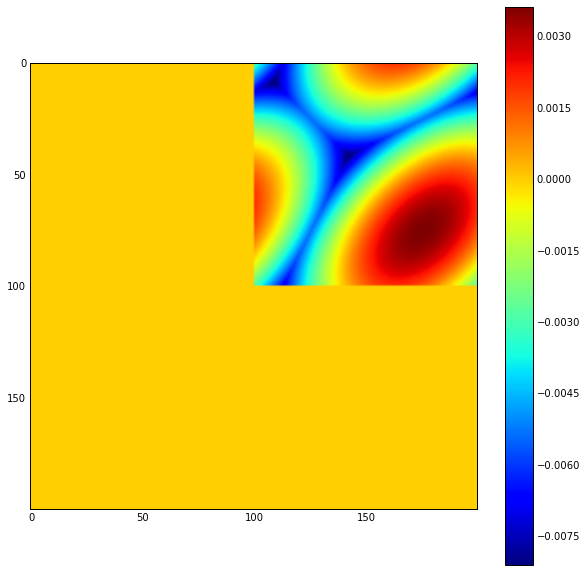

In [101]:
m = 1
n = 2
nosn = nn
orientations = np.arange(0, np.pi, np.pi/nosn)
orientations2 = np.expand_dims(orientations, axis=1)
orientations3 = np.expand_dims(orientations2, axis=2)
orientations4 = np.tile(orientations3, (1, m, n))
orientations4 = np.swapaxes(orientations4,0,1)
orientations4 = np.swapaxes(orientations4,1,2)
vector_length = np.size(orientations4.ravel())
matrix = np.zeros((vector_length, vector_length))
for i in range(vector_length):
    for j in range(vector_length):
        # Calculate the coordinates of the two neurons (x,y,preferred_orientation)
        first_neuron = calculateCoordinatesNew(i, orientations4.shape)
        second_neuron = calculateCoordinatesNew(j, orientations4.shape)
        # If the neurons respond to the same part of the visual field, don't have any connection between them
        if (first_neuron[0]==second_neuron[0] and first_neuron[1]==second_neuron[1]):
            continue
        # Model the connection of the neurons according to the elastica principle
        theta1 = orientations4[first_neuron[0],first_neuron[1],first_neuron[2]]
        theta2 = orientations4[second_neuron[0],second_neuron[1],second_neuron[2]]
        energy = en.E(theta1,theta2,[1,1])
        matrix[i,j] = -a*(energy-E0)
        matrix[j,i] = matrix[i,j]
matrix[nn:2*nn,:] = 0
showWeights(matrix, fig_size=10)
matrix2 = matrix

In [102]:
setNumberOfColors(nosn)
timesteps = 100
tau = 6

orientations = np.arange(0, np.pi, np.pi/nosn)
#ac_orient = np.random.rand(m,n)
responses = np.zeros((nosn, timesteps))
t = np.arange(0,timesteps,1)
ac_orient = np.array([[center],[flanker]])
spikes_ = vonMises(A,k,ac_orient,orientations)
spikes = spikes_.ravel(order='F')
r = np.zeros(len(spikes))
drdt = spikes/tau
rs = np.zeros(spikes.shape + (len(t),))
matrix = matrix2
for s in range(len(t)):
    r = r + drdt
    drdt = (-r + (spikes + np.dot(matrix,r)).clip(min=0))/tau
    rs[:,s] = r

rs = np.reshape(rs, spikes_.shape + (len(t),), order='F')
(direction, magnitude) = populationVector(orientations, rs, nosn, timesteps)
#dimensions = ['T']
#keys = [i for i in range(timesteps)]
#oneColor()
#r_first_neuron_hm = [(k, visualField(direction[:,:,k], aspect=n/float(m), fix_scale=True)) for k in keys]
#results = hv.HoloMap(r_first_neuron_hm, kdims=dimensions)

In [103]:
#rs2 = np.reshape(rs, spikes_.shape + (len(t),), order='F')
#rs2.shape

In [104]:
#rs.shape
#plt.plot(rs[0:32,99])
#plt.plot(rs[0:32,0])

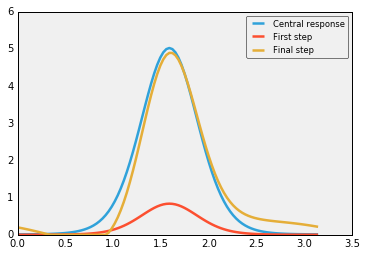

In [105]:
# Center
cen, = plt.plot(theta, spikes_[:,0,0], label='Central response')
mod, = plt.plot(theta, rs[:,0,0,0], label='First step')
com, = plt.plot(theta, rs[:,0,0,99], label='Final step')

plt.legend(handles=[cen, mod, com])

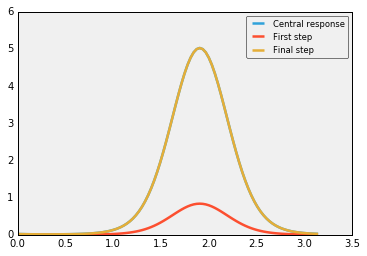

In [106]:
# Flanker
cen, = plt.plot(theta, spikes_[:,1,0], label='Central response')
mod, = plt.plot(theta, rs[:,1,0,0], label='First step')
com, = plt.plot(theta, rs[:,1,0,99], label='Final step')

plt.legend(handles=[cen, mod, com])

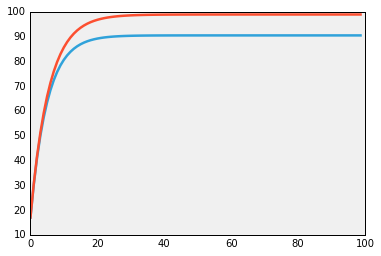

In [107]:
plt.plot(magnitude[0,0,:])
plt.plot(magnitude[1,0,:])


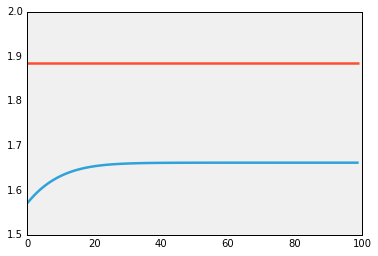

In [108]:
plt.ylim([1.5,2])
plt.plot(direction[0,0,:])
plt.plot(direction[1,0,:])


:Overlay
   .Curve.I      :Curve   [x]   (y)
   .Curve.II     :Curve   [x]   (y)
   .Curve.III    :Curve   [x]   (y)
   .Curve.IV     :Curve   [x]   (y)
   .Curve.V      :Curve   [x]   (y)
   .Curve.VI     :Curve   [x]   (y)
   .Curve.VII    :Curve   [x]   (y)
   .Curve.VIII   :Curve   [x]   (y)
   .Curve.IX     :Curve   [x]   (y)
   .Curve.X      :Curve   [x]   (y)
   .Curve.XI     :Curve   [x]   (y)
   .Curve.XII    :Curve   [x]   (y)
   .Curve.XIII   :Curve   [x]   (y)
   .Curve.XIV    :Curve   [x]   (y)
   .Curve.XV     :Curve   [x]   (y)
   .Curve.XVI    :Curve   [x]   (y)
   .Curve.XVII   :Curve   [x]   (y)
   .Curve.XVIII  :Curve   [x]   (y)
   .Curve.XIX    :Curve   [x]   (y)
   .Curve.XX     :Curve   [x]   (y)
   .Curve.XXI    :Curve   [x]   (y)
   .Curve.XXII   :Curve   [x]   (y)
   .Curve.XXIII  :Curve   [x]   (y)
   .Curve.XXIV   :Curve   [x]   (y)
   .Curve.XXV    :Curve   [x]   (y)
   .Curve.XXVI   :Curve   [x]   (y)
   .Curve.XXVII  :Curve   [x]   (y)
   .Curve.XXVIII :Curve   [x]   (y)
   .Curve.XXIX   :Curve   [x]   (y)
   .Curve.XXX    :Curve   [x]   (y)
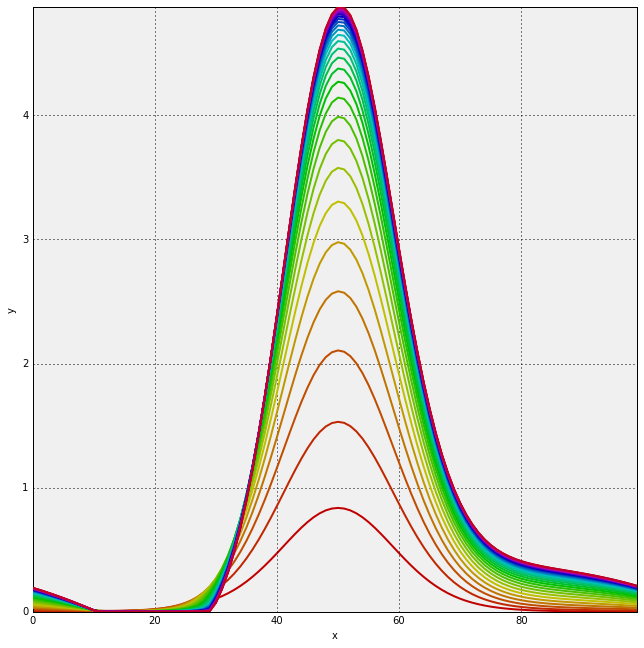

In [112]:
%%output size=300
timesteps = 30
setNumberOfColors(timesteps)

plot = hv.Curve(rs[:,0,0,0])
for i in range(1,timesteps):
    plot*=hv.Curve(rs[:,0,0,i])
plot

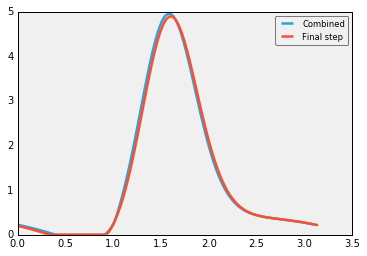

In [110]:
# strength of the modulation
a = 0.1
# different flanker orientations
theta = pl.linspace(0,pl.pi,nn)
# elastica energies for different flanker orientations (calculated below)
energies = np.zeros(nn)


# Elastica energies between neuron with orientation 1 rad and population of 32 neurons with variable orientation from 0 to pi
for i in range(nn):
    energies[i] = en.E(theta[i],flanker,[1,1])


modulation_ad = -a*(energies - E0)


# Central drive
curve,x,y = mises_curve(A,k,center,neuron=nn)


# Additive

pas, = plt.plot(x,(y+modulation_ad).clip(min=0), label='Combined')
dyn, = plt.plot(theta, rs[:,0,0,99], label='Final step')

plt.legend(handles=[pas, dyn])